In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import statsmodels.api as sm


In [10]:
#Importing data
data = pd.read_csv("Boats.csv")

In [11]:
data.head()

,Unnamed: 0,id,type,boatClass,make,model,year,condition,length_ft,beam_ft,...,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year
0,1,7252689,power,power-center,Aquasport,210 CC,1992,used,21.0,8.50,...,NaN,outboard-4s,16500.0,217053,Englewood,FL,34224,2019-10-16,10,2019
1,3,7228300,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40.0,11.00,...,2018.0,inboard-outboard,539000.0,44260,Harsens Island,MI,48028,2019-09-24,9,2019
2,5,7271336,power,power-deck,Bayliner,Element 180,2020,new,18.0,7.42,...,2019.0,outboard-4s,26995.0,220570,Marietta,OH,45750,2019-11-02,11,2019
3,6,7222952,power,power-expresscruiser,Regal,32 Express,2015,used,32.0,10.33,...,NaN,multiple,169995.0,34834,North Charleston,SC,29405,2019-09-19,9,2019
4,8,6824832,power,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.0,15.00,...,1994.0,inboard,109900.0,17942,Middle River,MD,21220,2018-08-29,8,2018


In [6]:
# Take selected columns
data.columns
data = data[['type','boatClass','make','model','year','condition','length_ft','beam_ft','dryWeight_lb','hullMaterial','engineCategory','price','city','state','zip','created_date']]

#Removing Null Values 
data = data.dropna()


In [13]:
# Data Overview
print("Rows",data.shape[0])
print("Columns",data.shape[1])
print("Missing values",data.isna().sum().values.sum())
print("Unique Values",data.nunique())

Rows 18903
Columns 26
Missing values 74812
Unique Values Unnamed: 0        18903
id                18903
type                  3
boatClass            72
make                960
model              7899
year                 80
condition             2
length_ft           599
beam_ft             350
dryWeight_lb       1160
hullMaterial          9
fuelType              4
numEngines            5
totalHP             286
maxEngineYear        67
minEngineYear        66
engineCategory        9
price              6074
sellerId           1375
city               1149
state                49
zip                1046
created_date       1424
created_month        12
created_year         16
dtype: int64


In [14]:
def value_count(column):
    plt.figure(figsize=(10,5))
    plt.grid(True)
    column.value_counts().plot(kind ="barh")

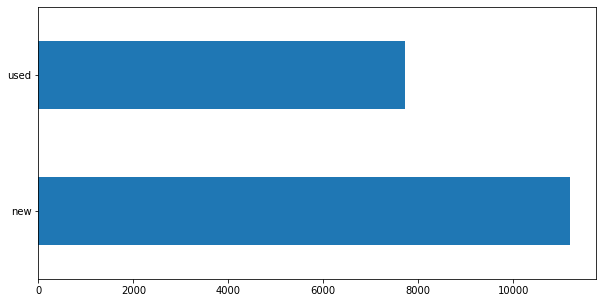

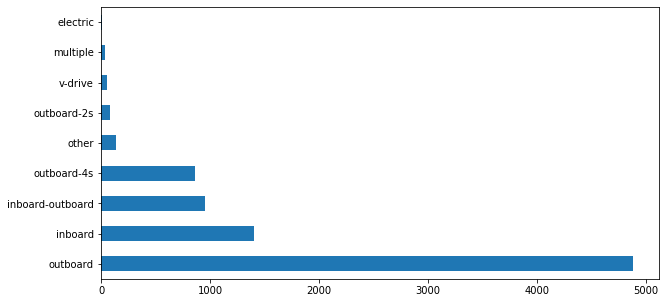

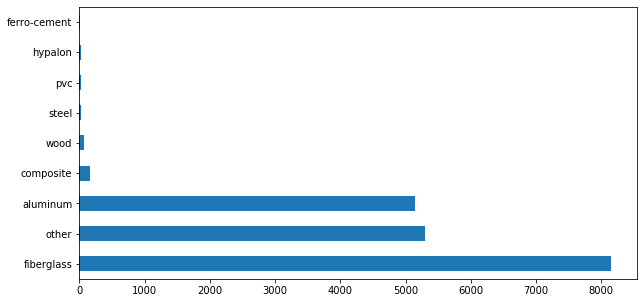

In [15]:
data.columns
value_count(data["condition"])
value_count(data["engineCategory"])
value_count(data["hullMaterial"])

In [16]:
data.describe()

,Unnamed: 0,id,year,length_ft,beam_ft,dryWeight_lb,numEngines,totalHP,maxEngineYear,minEngineYear,price,sellerId,created_month,created_year
count,18903.000000,1.890300e+04,18903.000000,18903.000000,12399.00000,7094.000000,18903.000000,18055.000000,2205.000000,2174.000000,1.890300e+04,18903.000000,18903.000000,18903.000000
mean,9782.042216,6.947263e+06,2013.145956,23.803935,16.19693,4754.142697,1.069513,112.849006,2007.927438,2007.919503,6.471469e+05,49891.652225,6.945511,2018.503465
std,5749.171393,4.820519e+05,10.502989,14.613329,36.83357,11626.382266,0.425528,286.137591,12.429153,12.462496,7.309567e+07,60725.592092,3.007115,1.093103
min,1.000000,4.449130e+05,1910.000000,1.000000,0.08000,8.000000,0.000000,0.000000,1938.000000,1938.000000,5.000000e+02,1003.000000,1.000000,2003.000000
25%,4783.500000,6.895201e+06,2011.000000,18.000000,7.83000,1175.000000,1.000000,0.000000,2001.000000,2001.000000,1.925500e+04,10550.000000,5.000000,2018.000000
50%,9603.000000,7.061616e+06,2019.000000,21.000000,8.50000,2001.000000,1.000000,0.000000,2012.000000,2012.000000,3.419500e+04,34482.000000,8.000000,2019.000000
75%,14718.500000,7.179152e+06,2019.000000,25.000000,9.00000,3375.000000,1.000000,115.000000,2019.000000,2019.000000,5.783000e+04,53226.000000,9.000000,2019.000000
max,20000.000000,7.271336e+06,2020.000000,375.000000,1311.00000,440000.000000,4.000000,7200.000000,2020.000000,2020.000000,1.000000e+10,269557.000000,12.000000,2019.000000


In [54]:
# length in feets , beam in feats, dryweight, totalHP, price are continues variable


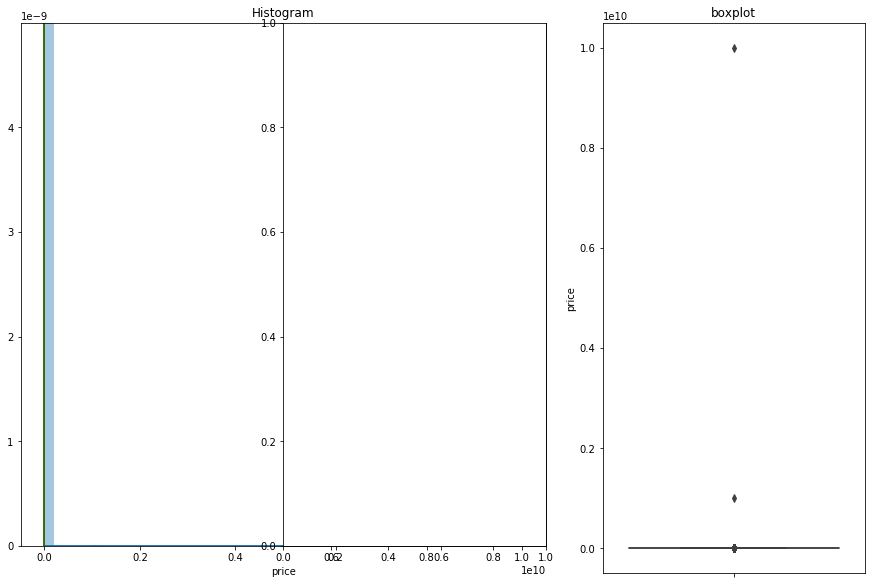

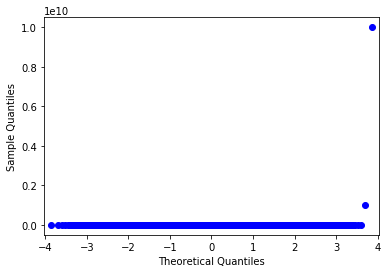

In [17]:
#Exploring Price
def plot_3_ways(df,feature):
    fig = plt.figure(constrained_layout = True, figsize=(12,8))
    grid = gridspec.GridSpec(ncols =3, nrows =3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0:2])
    ax1.set_title("Histogram")
    
    sns.distplot(df.loc[:,feature])
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1:2])
    sm.qqplot(df[feature])
    
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title("boxplot")
    sns.boxplot(df[feature], ax=ax3, orient ="v")
    
plot_3_ways(data,"price")
    
    
    
    

It shows our distribution is heavily skewed to the right side.

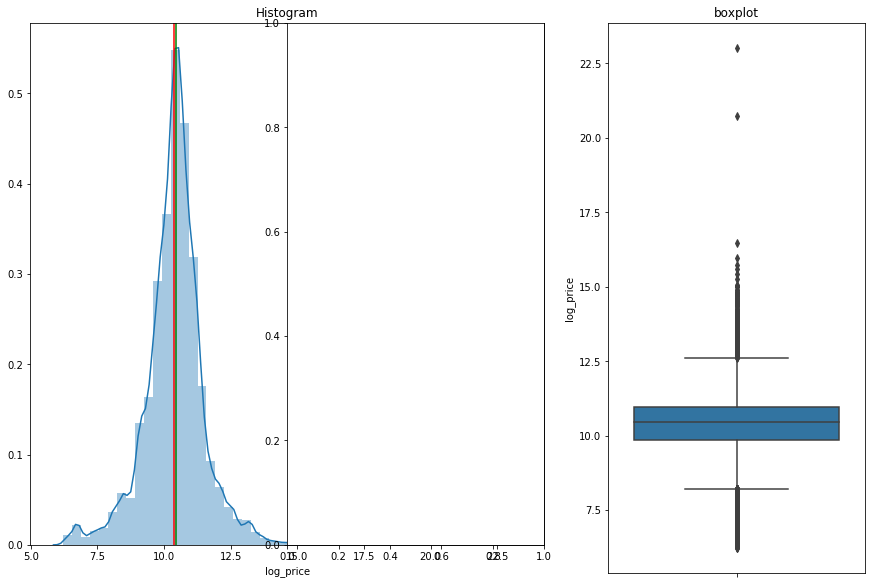

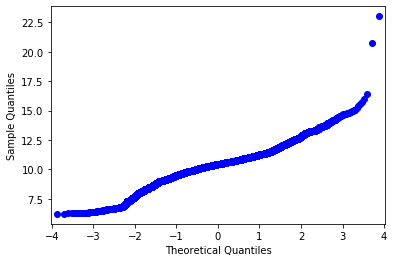

In [19]:
#changing price to log price and observing the new distribution
data["log_price"] = np.log(data["price"])
plot_3_ways(data,"log_price")

on transforming price to log, it gives us a better distribution of price. 

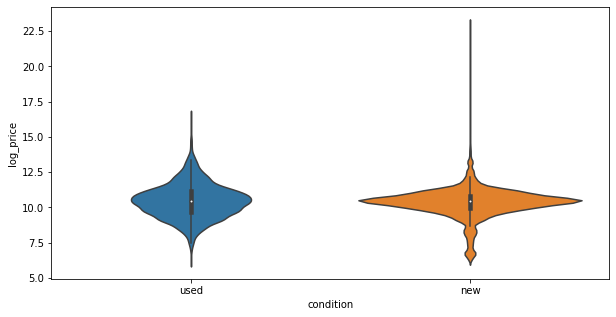

In [20]:
# Let's observe the effect of price on new and used boats.
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="condition", y="log_price", data=data)

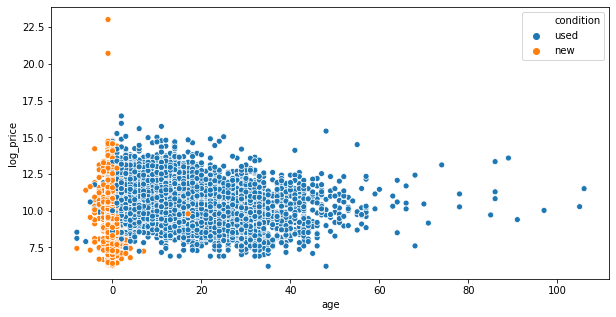

In [21]:
#Creating a new variable age
data["age"] = data["created_year"] - data["year"]
#grid = gridspec.GridSpec(ncols =3, nrows =3, figure = fig)
    
#ax1 = fig.add_subplot(grid[0:1])
#ax1.set_title("Age vs Price")
#plt.axis([0, 100, 0, 0.2])
plt.figure(figsize=(10,5))
scatter = sns.scatterplot(data=data, x='age', y='log_price',hue ="condition")
#scatter.set_ylim(bottom=0, top=0.6)
#sns.scatterplot(data=data, x="age", y="log_price", hue='condition')
    

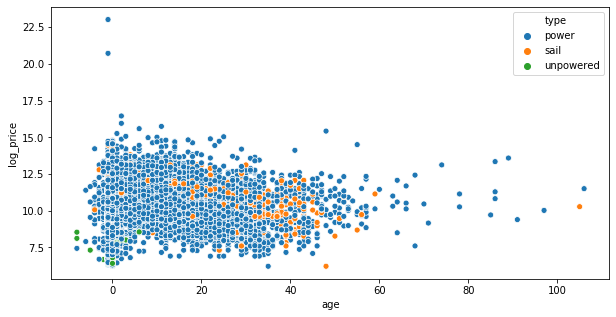

In [142]:
plt.figure(figsize=(10,5))
scatter = sns.scatterplot(data=data, x='age', y='log_price',hue ="type")

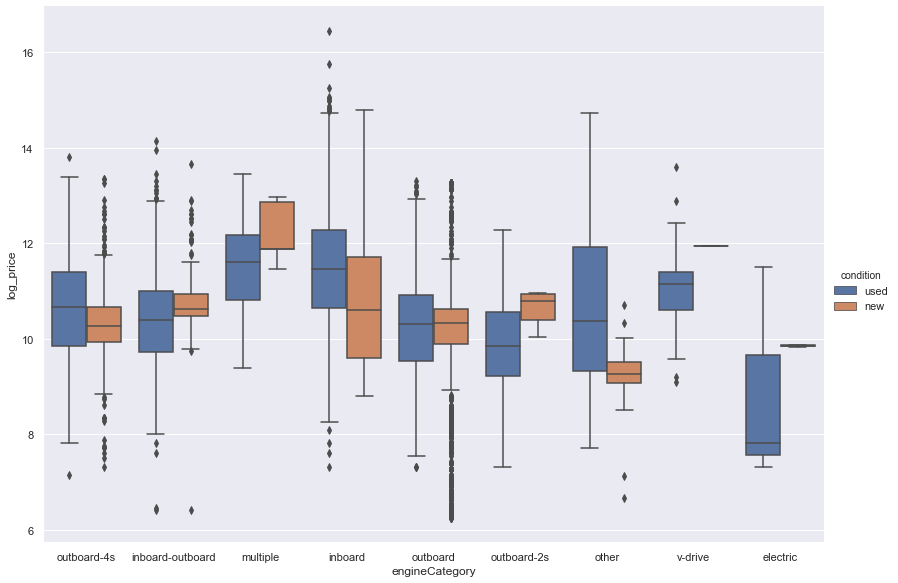

In [150]:
#sns.set(rc={'figure.figsize':(20,10)})
sns.catplot(x="engineCategory", y="log_price", hue="condition", kind="box", data=data,height=8.27, aspect=11.7/8.27)

Observing Correlation ofcontinues variables in order to look for any correlation. 
relationship of price with length, beam_ft, age, dryweight_lb,totalHP

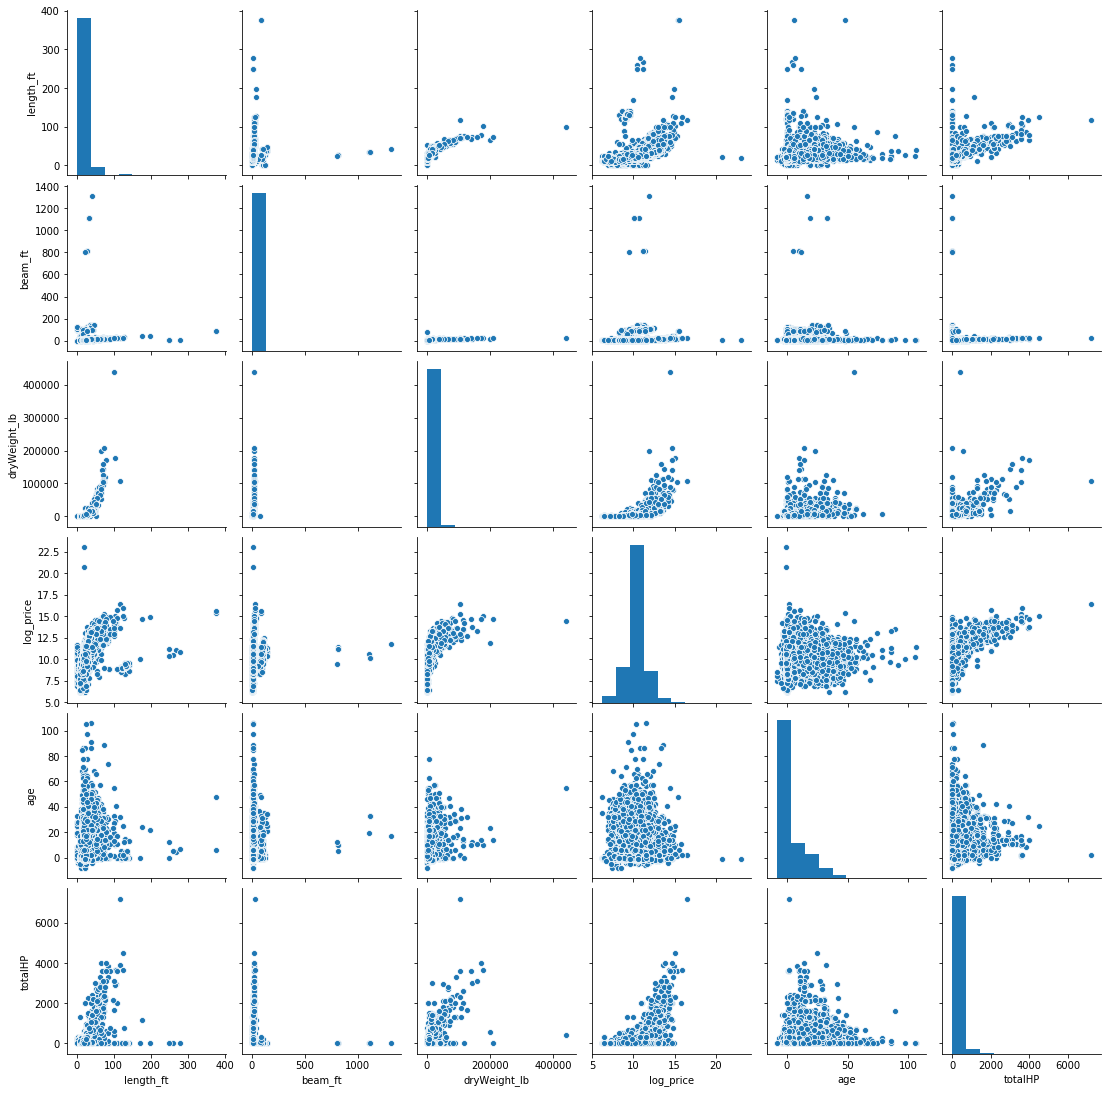

In [28]:
numerical_features = ['length_ft','beam_ft','dryWeight_lb','log_price','age','totalHP']
data_numerical = data[numerical_features]
sns.pairplot(data_numerical)

There is definitely some relationship of price with age, length, dryweight and totalHP.

In [ ]:
#watching the relationship between price,length and boat_class

['power-pontoon',
 'power-bowrider',
 'power-bass',
 'power-center',
 'power-cruiser']

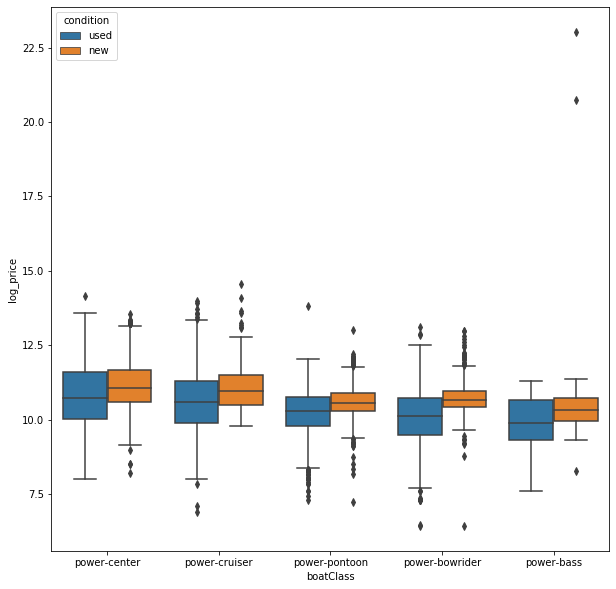

In [25]:
def top_5(data,column1_category,column2_continues,hue):
    new_df = data[column1_category].value_counts().nlargest(5).reset_index()
    series = new_df["index"].tolist()
    df_filtered = data[data[column1_category].isin(series)]
    plt.figure(figsize=(10,10))
    ax = sns.boxplot(y=column2_continues, x=column1_category, hue=hue,
                 data=df_filtered)
    return series
    

top_5(data,'boatClass','log_price','condition')

['outboard', 'inboard', 'inboard-outboard', 'outboard-4s', 'other']

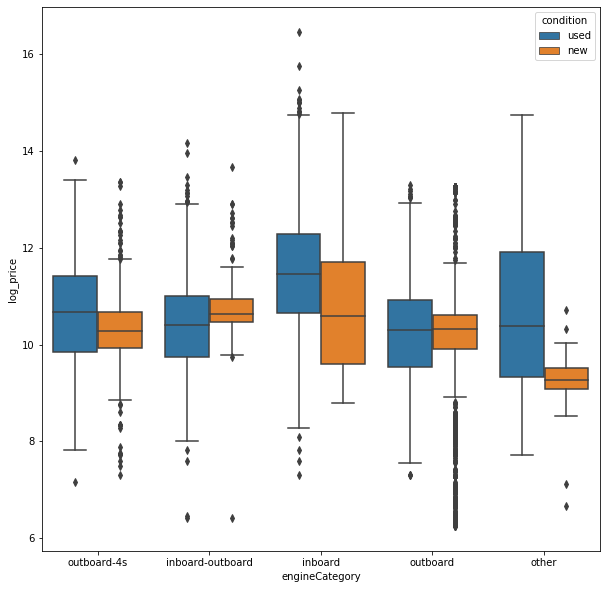

In [26]:
top_5(data,'engineCategory','log_price','condition')

seems like older boats have higher prices for the engine category like outboard, inboard-outboard and inboard.

In [51]:
#Horse Power and price with new and old boat
#fueltype and horsePower
#Does Dryweight has anthing to do with new and old boats and if it does how does it affect price overall
#Age, Engine, Price
#Engine and Price
#Geographical Plots.
#summary

['power-pontoon',
 'power-bowrider',
 'power-bass',
 'power-center',
 'power-cruiser']

['Tracker', 'Sun Tracker', 'Bennington', 'Yamaha Boats', 'Sea Ray']

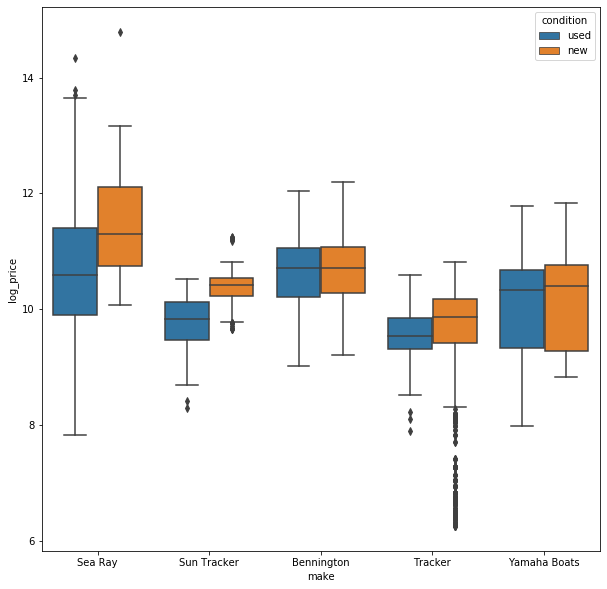

In [32]:
#Checking make with log_price and condition
top_5(data,'make','log_price','condition') 

['fiberglass', 'other', 'aluminum', 'composite', 'wood']

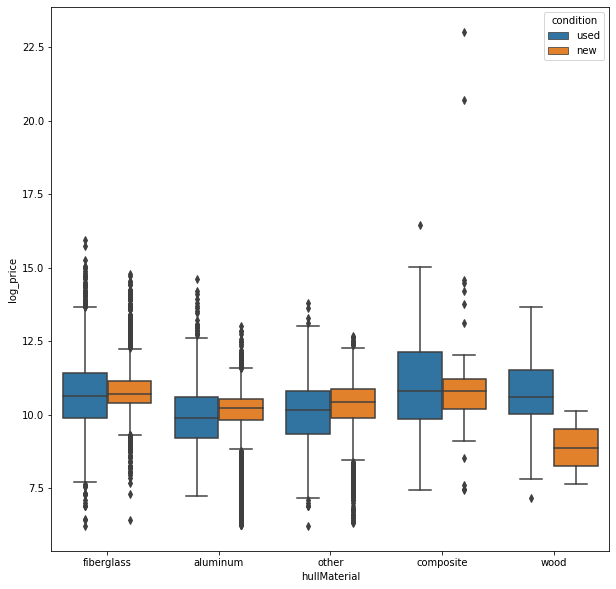

In [33]:
#checking hull material with price
top_5(data,'hullMaterial','log_price','condition') 

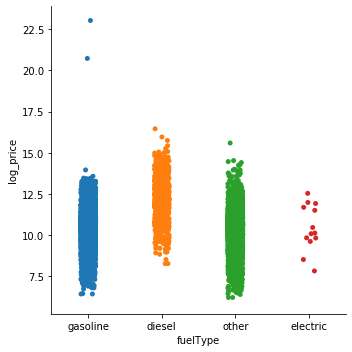

In [38]:
#fuel type and price
sns.catplot(x="fuelType", y="log_price",data=data)


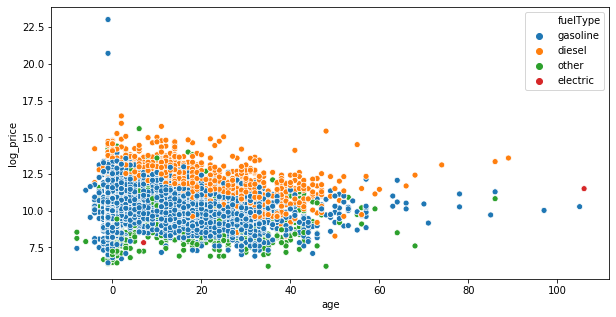

In [39]:
#age and fuel_type with price
plt.figure(figsize=(10,5))
scatter = sns.scatterplot(data=data, x='age', y='log_price',hue ="fuelType")

<Figure size 1440x3600 with 0 Axes>

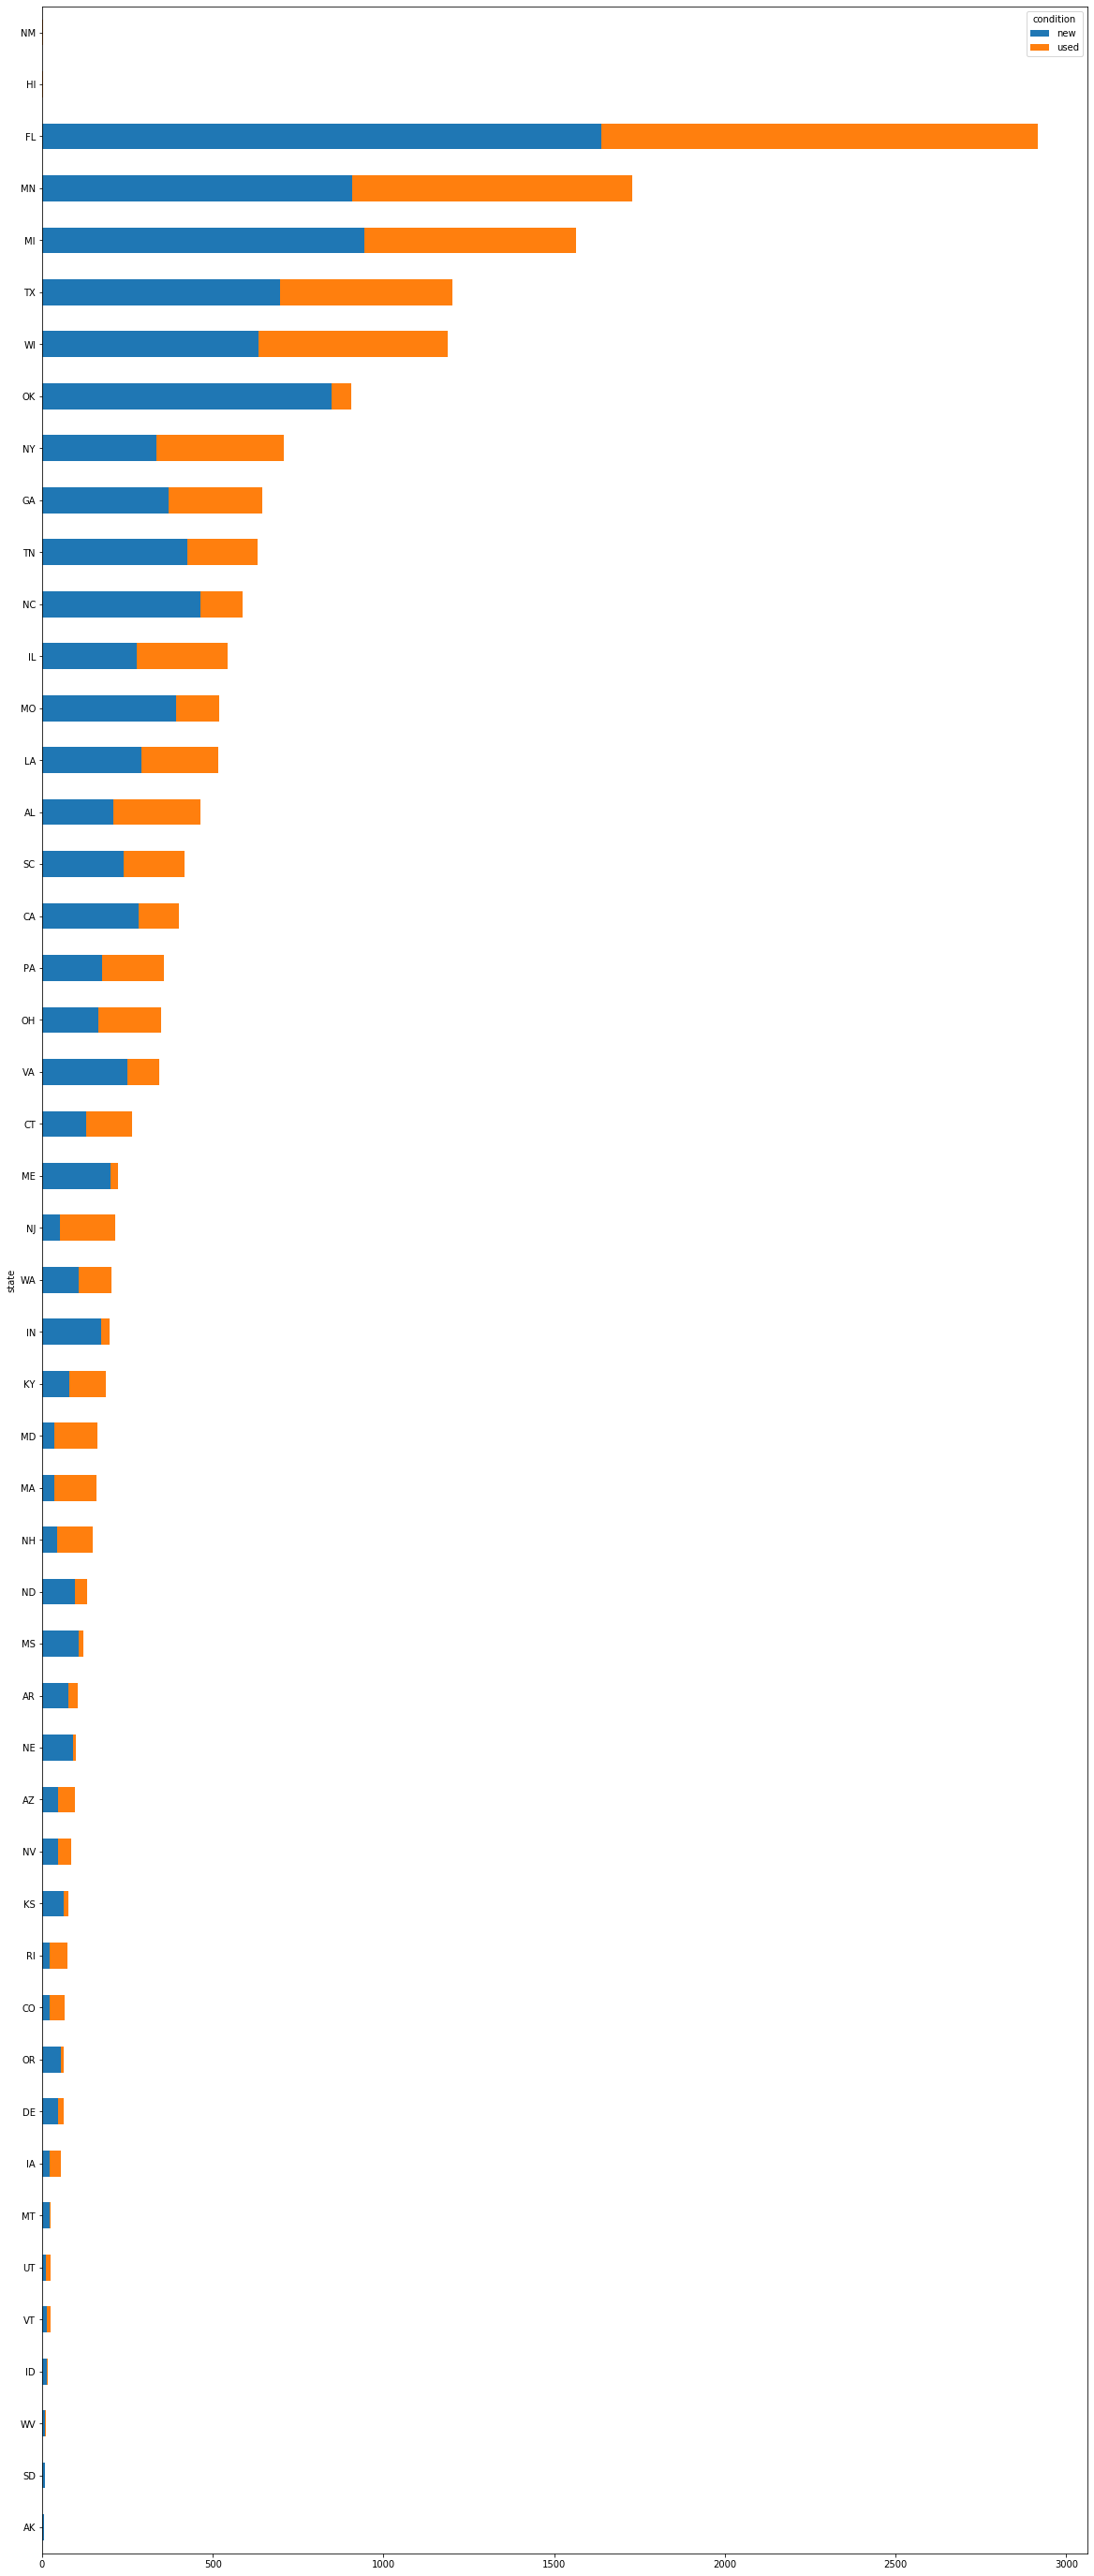

In [87]:
#Statewise count
plt.figure(figsize=(20,50))
df_plot = data.groupby(['state', 'condition']).size().sort_values(ascending = False).reset_index().pivot(columns='condition', index='state', values=0)
df_plot["sum"] = df_plot['new'] + df_plot["used"]
df_plot = df_plot.sort_values(by=['sum'])
df_plot = df_plot.drop(columns=['sum'])

#plt.figure(figsize=(20,50))
df_plot.plot(kind='barh', stacked=True, figsize= (20,50))
plt.show()

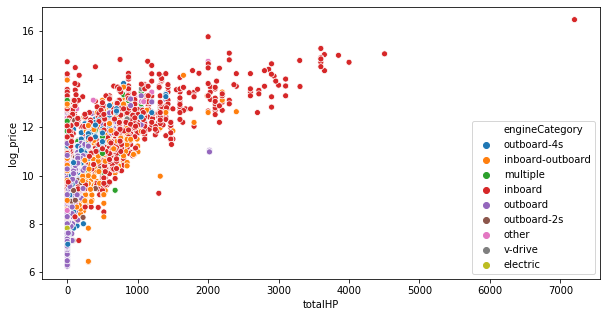

In [90]:
#HP and Price with new and old boats
plt.figure(figsize=(10,5))

scatter = sns.scatterplot(data=data, x='totalHP', y='log_price')
#Exploring more on engine category here


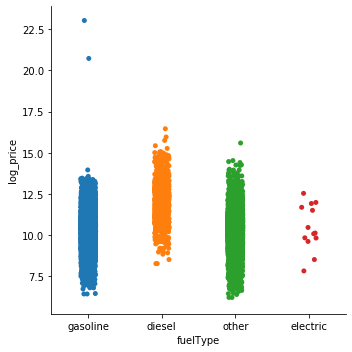

In [91]:
sns.catplot(x="engineCategory", y="log_price", hue = "".data=data)

In [76]:
df_plot = data.groupby(['state', 'condition']).size().sort_values(ascending = False).reset_index()

In [92]:
data["make"].value_counts()

Tracker               1894
Sun Tracker            907
Bennington             843
Yamaha Boats           728
Sea Ray                728
                      ... 
Chris Craft Launch       1
Motor Surf Boat          1
Northcoast Yachts        1
Encore                   1
Shallow Stalker          1
Name: make, Length: 960, dtype: int64

In [88]:
#How make and age impact price


Index(['Unnamed: 0', 'id', 'type', 'boatClass', 'make', 'model', 'year',
       'condition', 'length_ft', 'beam_ft', 'dryWeight_lb', 'hullMaterial',
       'fuelType', 'numEngines', 'totalHP', 'maxEngineYear', 'minEngineYear',
       'engineCategory', 'price', 'sellerId', 'city', 'state', 'zip',
       'created_date', 'created_month', 'created_year', 'log_price', 'age'],
      dtype='object')